# **Un supervised task Mall_Customer clustering** #

# **import libraries** #

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# **load dataset** #

In [2]:
data=pd.read_csv("Mall_Customers.csv")
data.head().style.background_gradient()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.tail().style.background_gradient()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

# **data preprocessing** #

In [8]:
# apply label encoder on gender column
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data["Gender"]=lb.fit_transform(data["Gender"])
print("data after encoding =")
data.head().style.background_gradient()


data after encoding =


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [9]:
data=data.dropna()

In [10]:
data=data.drop(["CustomerID"],axis=1)

In [11]:
data.tail().style.background_gradient(cmap="Greens")

,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18
199,1,30,137,83


# **data visualization** # 

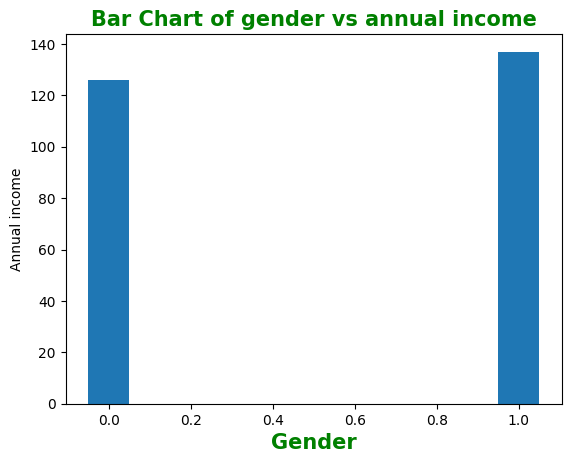

In [12]:
plt.bar(data["Gender"], data["Annual Income (k$)"],width=0.1)
plt.xlabel('Gender',fontdict={"size":15,"color":"green","weight":"bold"})
plt.ylabel('Annual income')
plt.title('Bar Chart of gender vs annual income',fontdict={"size":15,"color":"green","weight":"bold"})
plt.show()

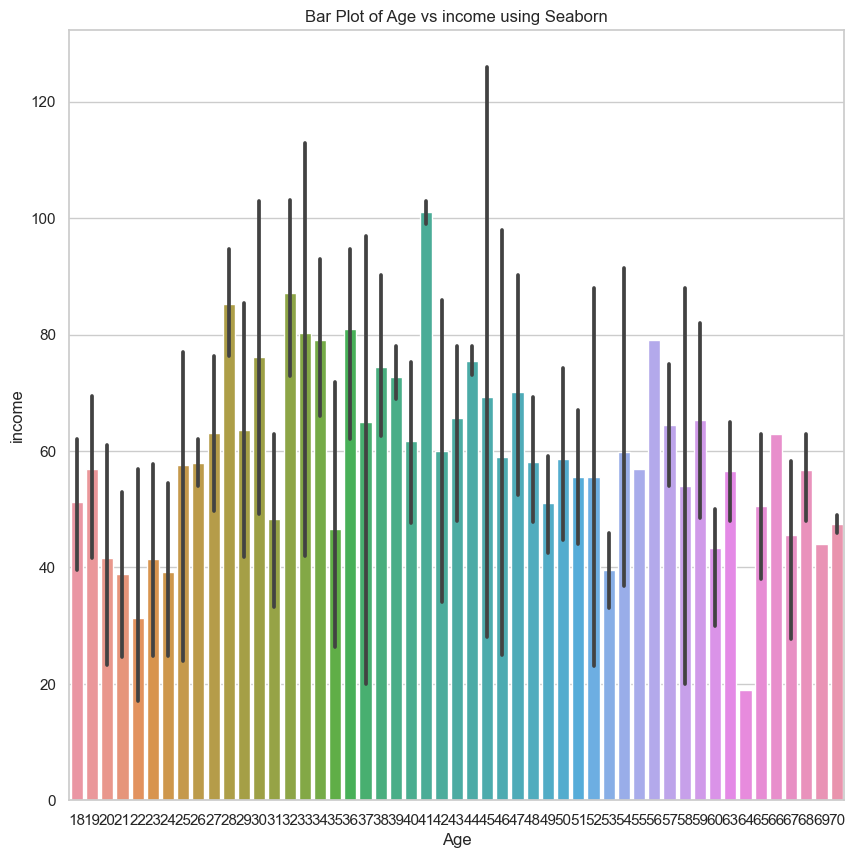

In [13]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.barplot(x=data["Age"], y=data["Annual Income (k$)"])
plt.xlabel('Age')
plt.ylabel('income')
plt.title('Bar Plot of Age vs income using Seaborn')
plt.show()

In [14]:
# apply pca
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_result = pca.fit_transform(data)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Explained Variance Ratio: [0.45118077 0.44091539]


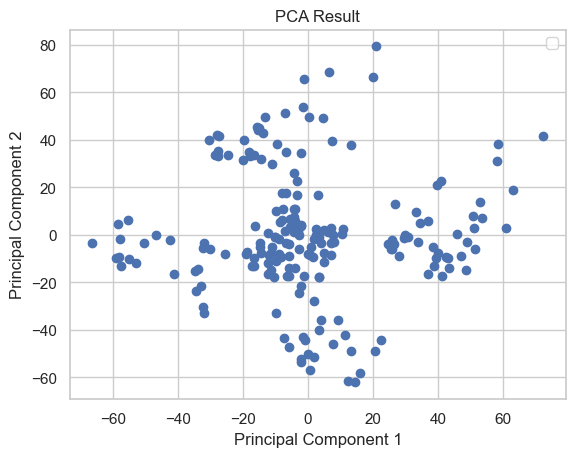

In [15]:
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")

# Plot the data in the reduced-dimensional space
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

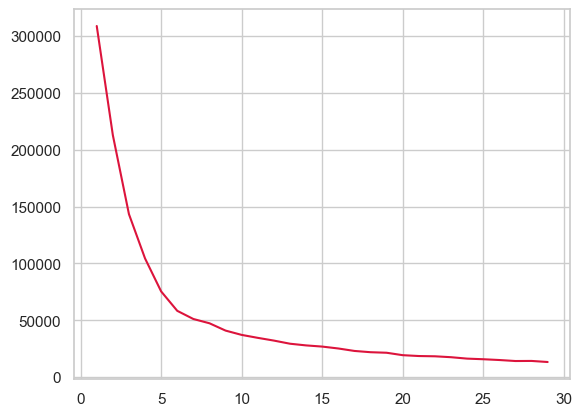

In [16]:
# for choose the best number of clusters
from sklearn.cluster import KMeans
km=KMeans()
loss = []
for i in range(1, 30):
    km = KMeans(n_clusters = i)
    km.fit(data)
    loss.append(km.inertia_)
plt.plot(range(1, 30), loss, color = 'crimson')
plt.show()

# **apply k-means algorithm** #

c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\moham\AppData\Local\Temp\ipykernel_8896\3128206966.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'],
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


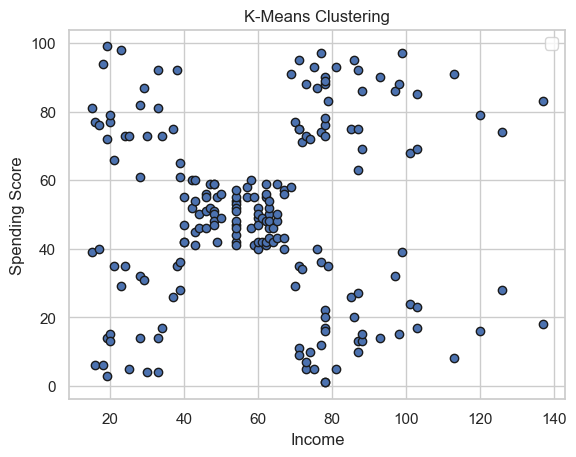

In [25]:
from sklearn .cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
km=KMeans(n_clusters=8,random_state=42)
# km.fit_transform(data)
km.fit(data)
data_km=km.predict(data)

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'],
             cmap='oranges',edgecolor='k')
plt.title('K-Means Clustering')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()



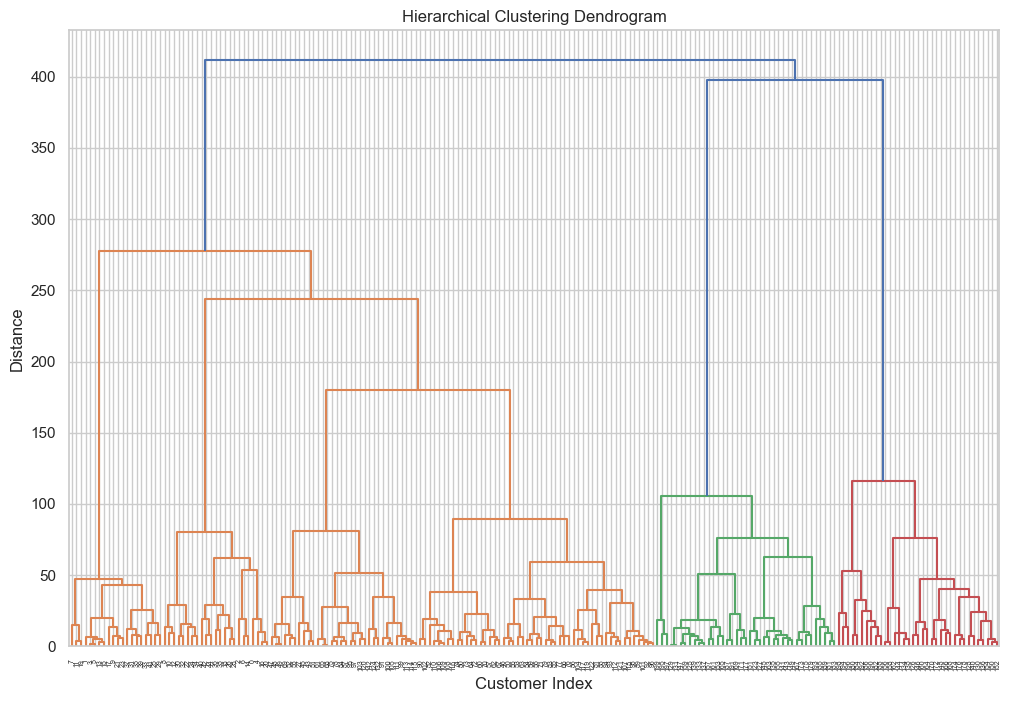

In [18]:
  
# You can choose a different linkage method if needed
linkage_matrix = linkage(data, method='ward')
# Plot the hierarchical clustering dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

In [19]:
inertia = km.inertia_
print(f"Inertia: {inertia}")

Inertia: 44687.235534005464
